# Principal components analysis (PCA) with `scikit-learn`


scikit-learn is a machine learning library for python, with a very easy to use API and great documentation.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import mdtraj as md

Lets load up our trajectory. This is the trajectory that we generated in
the "Running a simulation in OpenMM and analyzing the results with mdtraj"
example.

In [2]:
traj = md.load("ala2.h5")
traj

/Users/singhs15/work/src/dev-projs/mdtraj/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


<mdtraj.Trajectory with 100 frames, 22 atoms, 3 residues, without unitcells at 0x10c04be50>

Create a two component PCA model, and project our data down into this
reduced dimensional space. Using just the cartesian coordinates as
input to PCA, it's important to start with some kind of alignment.

In [3]:
pca1 = PCA(n_components=2)
traj.superpose(traj, 0)

<mdtraj.Trajectory with 100 frames, 22 atoms, 3 residues, without unitcells at 0x10c04be50>

In [4]:
reduced_cartesian = pca1.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
print(reduced_cartesian.shape)

(100, 2)


Now we can plot the data on this projection.

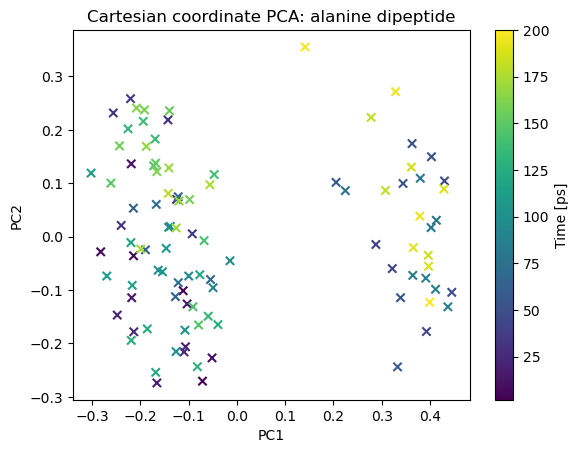

In [5]:
plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:, 1], marker="x", c=traj.time)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cartesian coordinate PCA: alanine dipeptide")
cbar = plt.colorbar()
cbar.set_label("Time [ps]")

Lets try cross-checking our result by using a different feature space that isn't sensitive to alignment, and instead to "featurize" our trajectory by computing the pairwise distance between every atom  in each frame, and using that as our high dimensional input space for PCA.

In [ ]:
from itertools import combinations

pca2 = PCA(n_components=2)

# this python function gives you all unique pairs of elements from a list

atom_pairs = list(combinations(range(traj.n_atoms), 2))
pairwise_distances = md.geometry.compute_distances(traj, atom_pairs)
print(pairwise_distances.shape)
reduced_distances = pca2.fit_transform(pairwise_distances)

(100, 231)


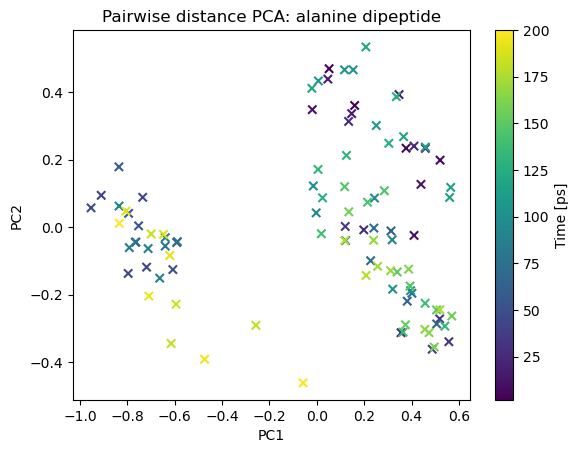

In [7]:
plt.figure()
plt.scatter(reduced_distances[:, 0], reduced_distances[:, 1], marker="x", c=traj.time)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Pairwise distance PCA: alanine dipeptide")
cbar = plt.colorbar()
cbar.set_label("Time [ps]")